In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()

In [2]:
traindata = pd.read_csv('Data/train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
CA = pd.DataFrame(traindata['CentralAir'])  # Response
SP = pd.DataFrame(traindata['SalePrice']) # Predictor

In [4]:
#Train Set : 1460*0.8 samples
SP_train = pd.DataFrame(SP[:int(1460*0.8)])
CA_train = pd.DataFrame(CA[:int(1460*0.8)])

# Test Set : 1460*0.2 samples
SP_test = pd.DataFrame(SP[int(-1460*0.2):])
CA_test = pd.DataFrame(CA[int(-1460*0.2):])

# Check the sample sizes
print("Train Set :", CA_train.shape, SP_train.shape)
print("Test Set  :", CA_test.shape, SP_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [5]:
type(CA_train["CentralAir"])

pandas.core.series.Series

In [6]:
# Summary Statistics for Centralair Train
CA_train["CentralAir"].value_counts()

Y    1090
N      78
Name: CentralAir, dtype: int64

In [7]:
# Summary Statistics for SalePrice Train
SP_train.describe()
CA_train.describe()

,CentralAir
count,1168
unique,2
top,Y
freq,1090


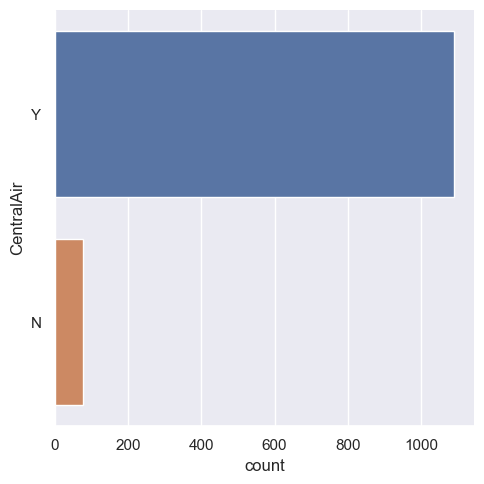

In [8]:
# Count Plot for Legendary Train
sb.catplot(y = "CentralAir", data = CA_train, kind = "count")

In [9]:
# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = SP_train, orient = "h", ax = axes[0])
sb.histplot(data = SP_train, ax = axes[1])
sb.violinplot(data = SP_train, orient = "h", ax = axes[2])

<AxesSubplot:>

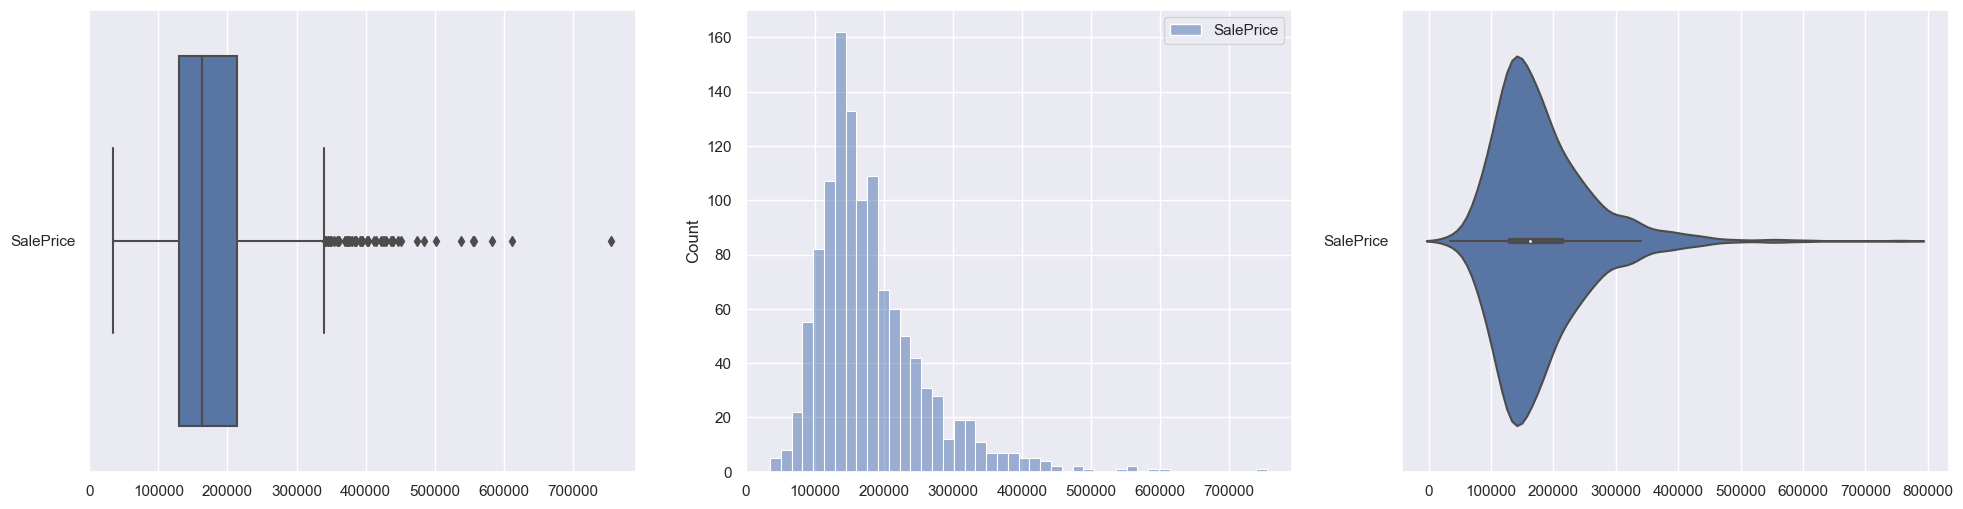

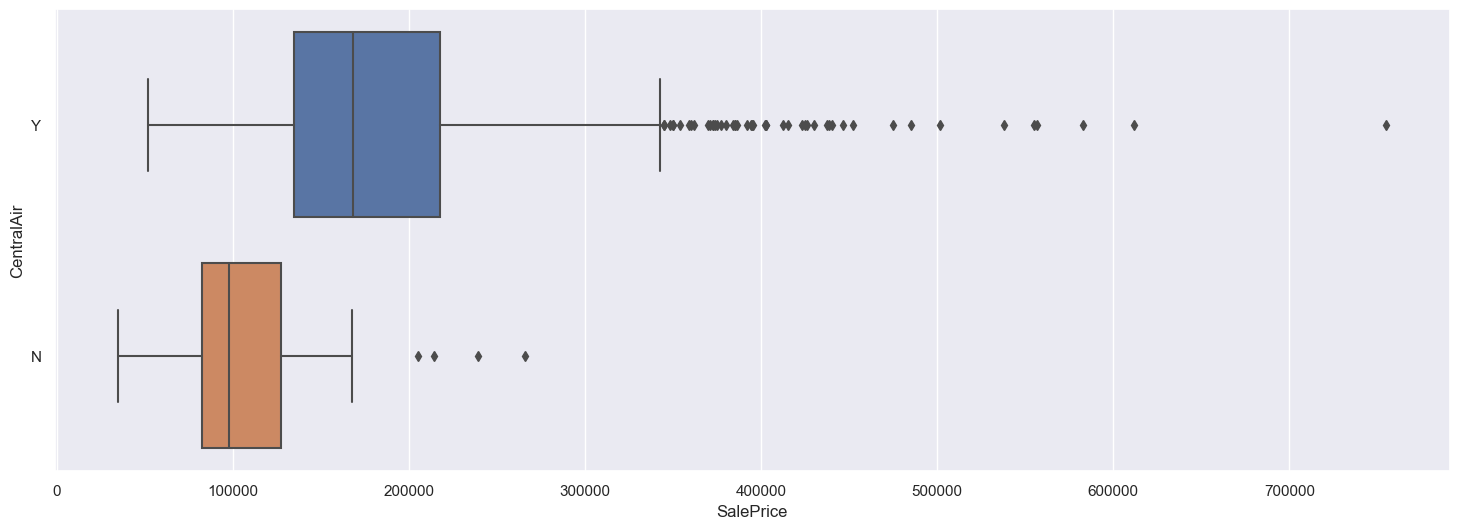

In [10]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([SP_train, CA_train], axis = 1).reindex(SP_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")
plt.show()

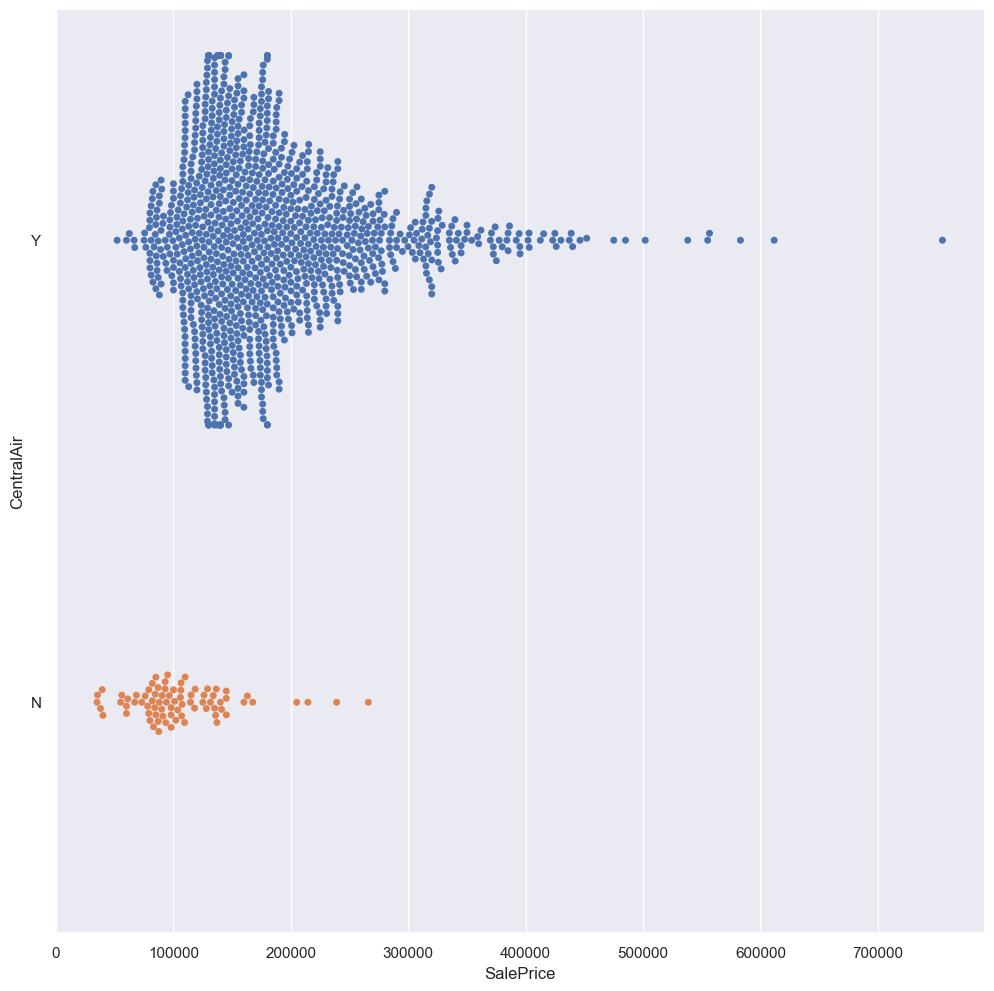

In [11]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([SP_train, CA_train], axis = 1).reindex(SP_train.index)

# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(12, 12))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9417808219178082

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9417808219178082



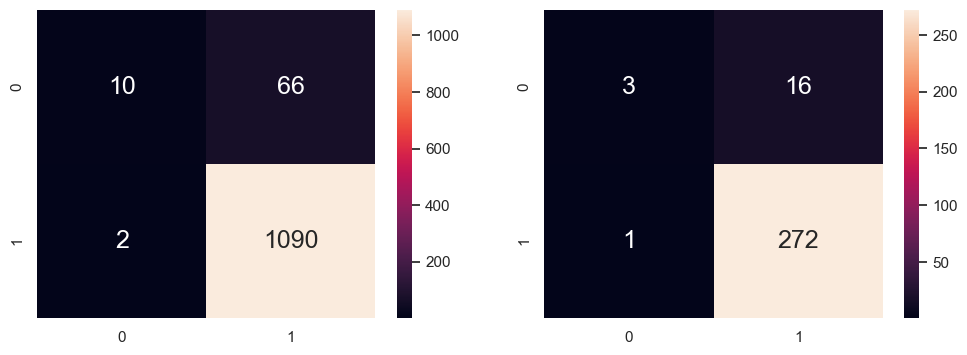

In [12]:
# Import essential models and functions from sklearn
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
CA = pd.DataFrame(traindata['CentralAir'])   # Response
SP = pd.DataFrame(traindata['SalePrice'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SP, CA, test_size = 0.20)

# Decision Tree using Train Data
depth2 = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
depth2.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = depth2.predict(X_train)
y_test_pred = depth2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", depth2.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", depth2.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [13]:
TP = 1091
FP = 67
TN = 9
FN = 1

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)

True Positive Rate (TPR): 0.9990842490842491
False Positive Rate (FPR): 0.881578947368421


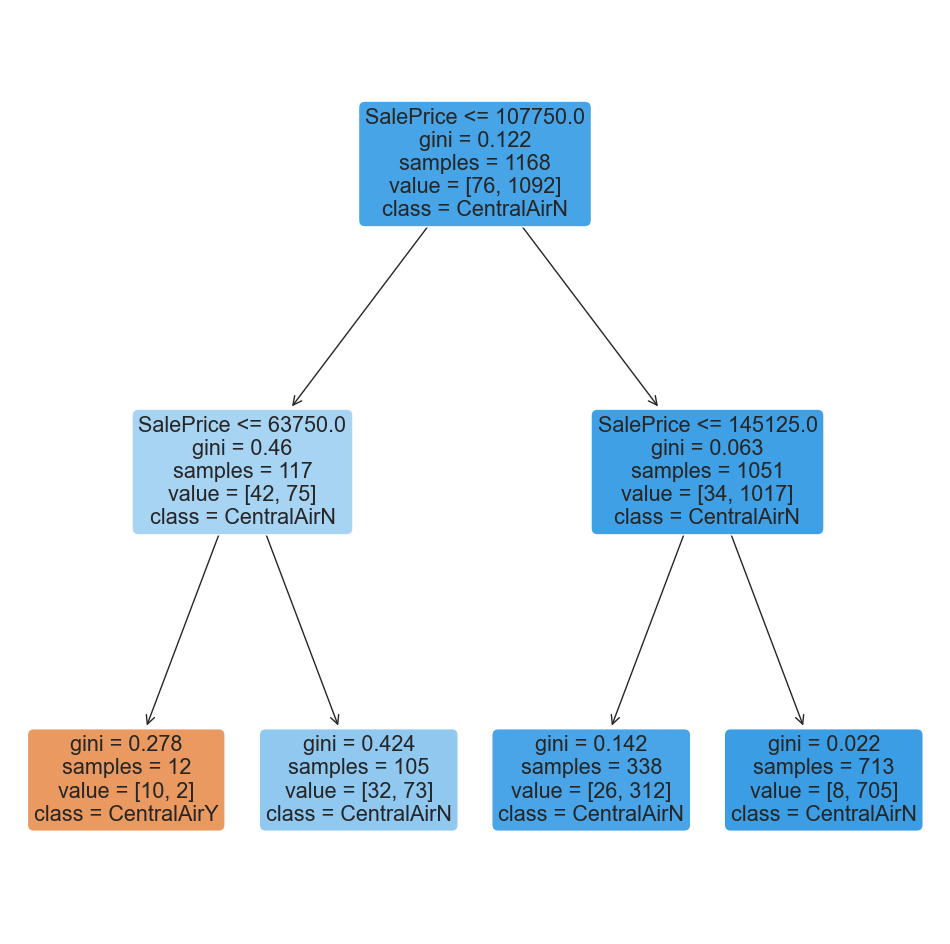

In [14]:
# Plot the trained Decision Tree
#from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(depth2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["CentralAirY","CentralAirN"])
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9443493150684932

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.934931506849315



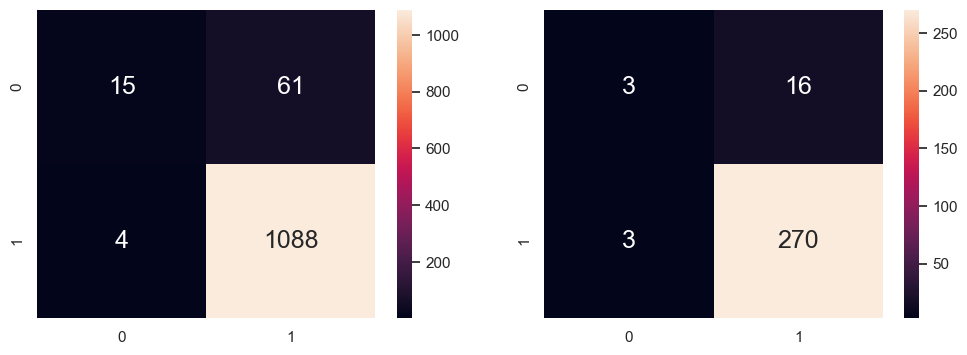

In [15]:
#Same thing with depth 4
# Decision Tree using Train Data
depth4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
depth4.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = depth4.predict(X_train)
y_test_pred = depth4.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", depth4.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", depth4.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [16]:
TP = 1087
FP = 61
TN = 15
FN = 5

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)

True Positive Rate (TPR): 0.9954212454212454
False Positive Rate (FPR): 0.8026315789473685


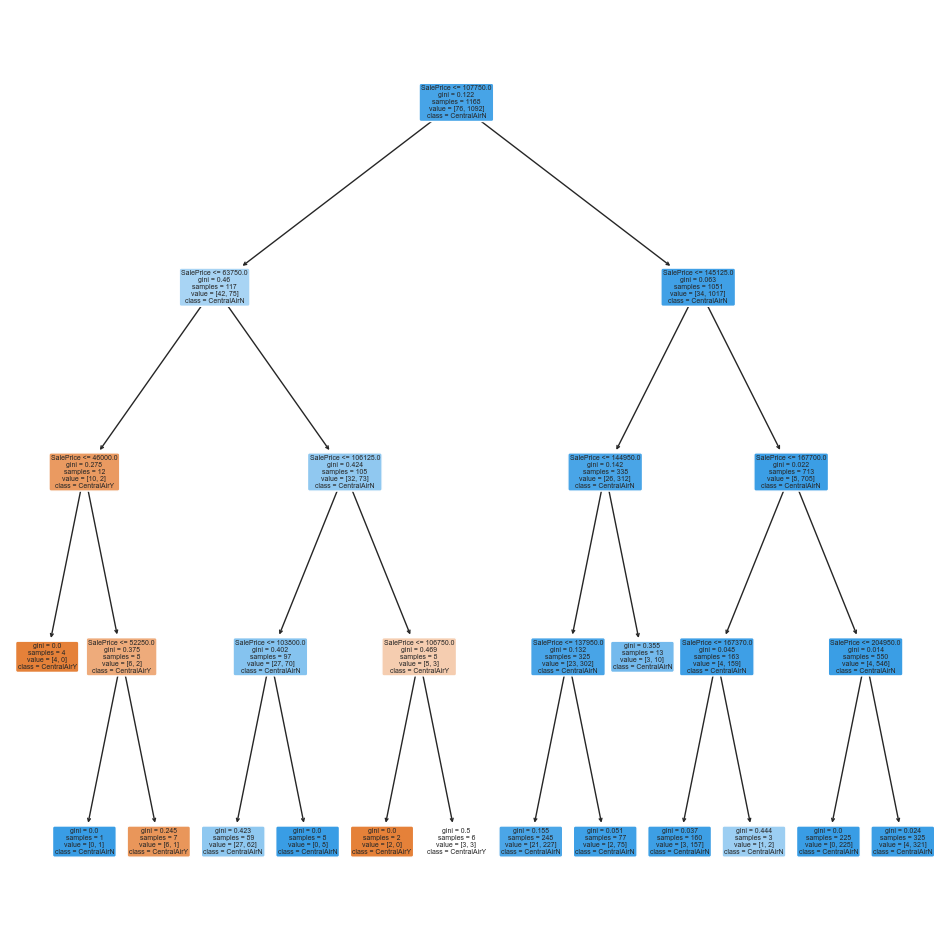

In [17]:
# Plot the trained Decision Tree
#from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(depth4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["CentralAirY","CentralAirN"])
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9477739726027398

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9383561643835616



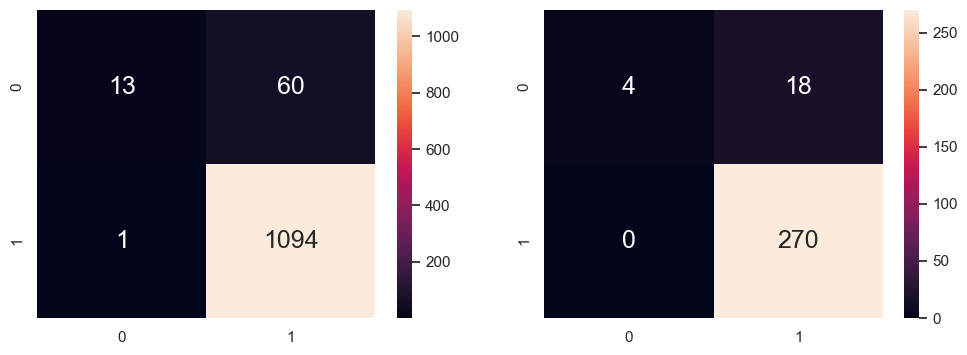

In [18]:
#qn2
# Recall the Legendary-Total Dataset
CA = pd.DataFrame(traindata['CentralAir'])   # Response
OQ = pd.DataFrame(traindata['OverallQual'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SP, CA, test_size = 0.20)

# Decision Tree using Train Data
depth4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
depth4.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = depth4.predict(X_train)
y_test_pred = depth4.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", depth4.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", depth4.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

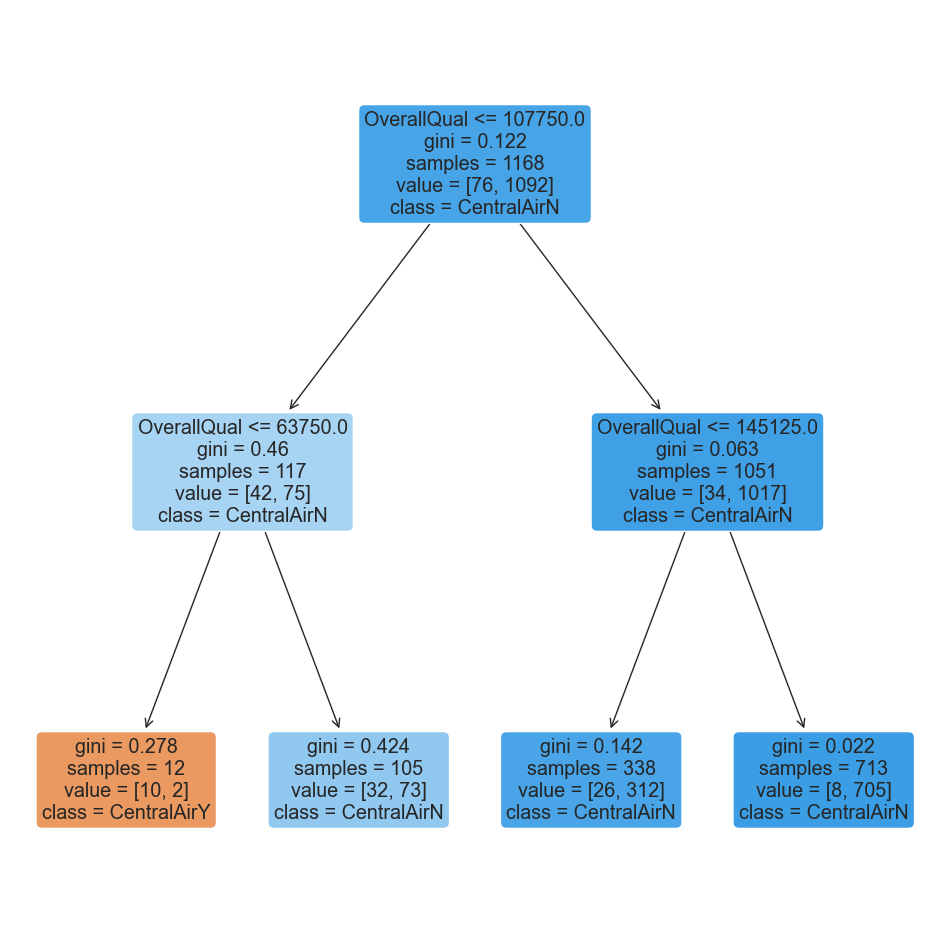

In [19]:
# Plot the trained Decision Tree
#from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(depth2, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["CentralAirY","CentralAirN"])
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9417808219178082

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.952054794520548



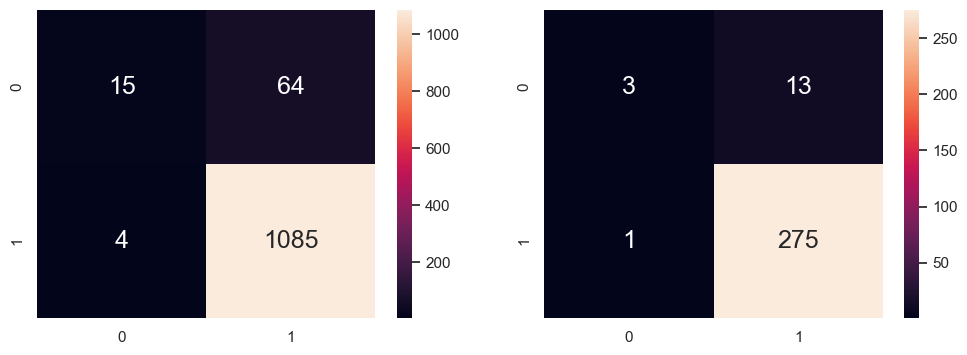

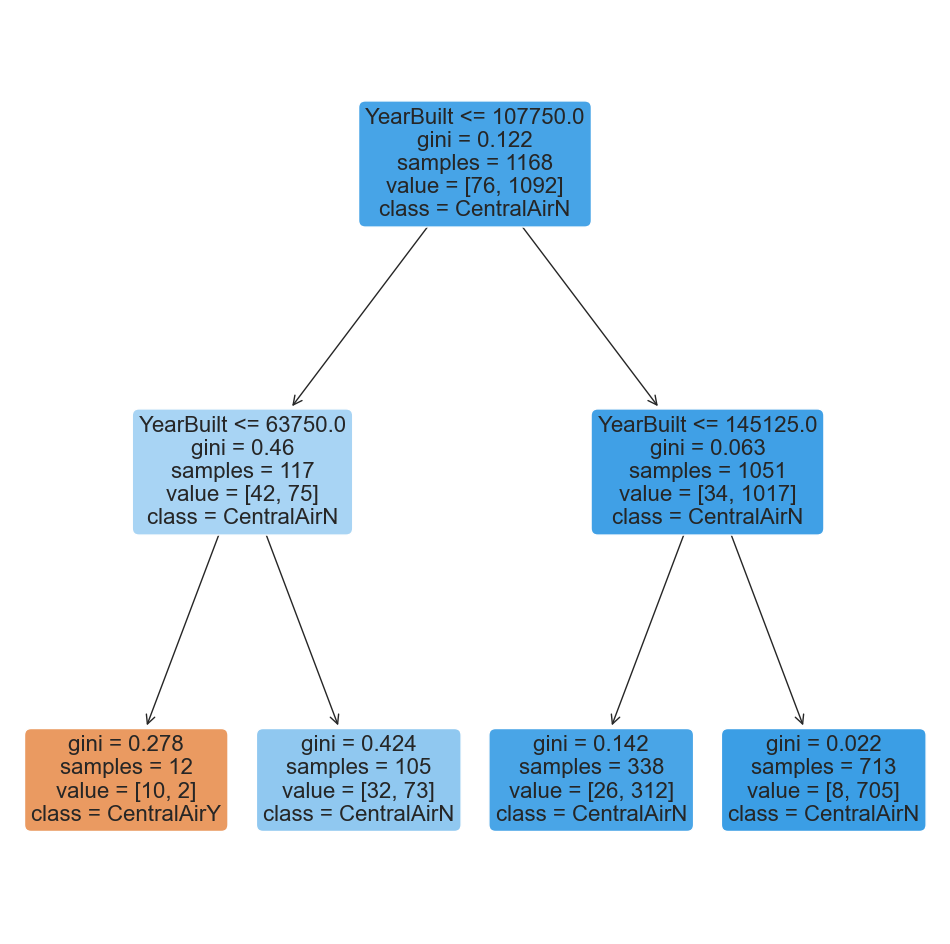

In [20]:
#qn 2 
# Recall the Legendary-Total Dataset
CA = pd.DataFrame(traindata['CentralAir'])   # Response
YB = pd.DataFrame(traindata['YearBuilt'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SP, CA, test_size = 0.20)

# Decision Tree using Train Data
depth4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
depth4.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = depth4.predict(X_train)
y_test_pred = depth4.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", depth4.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", depth4.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
#from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(depth2, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["CentralAirY","CentralAirN"])
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9417808219178082

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.952054794520548



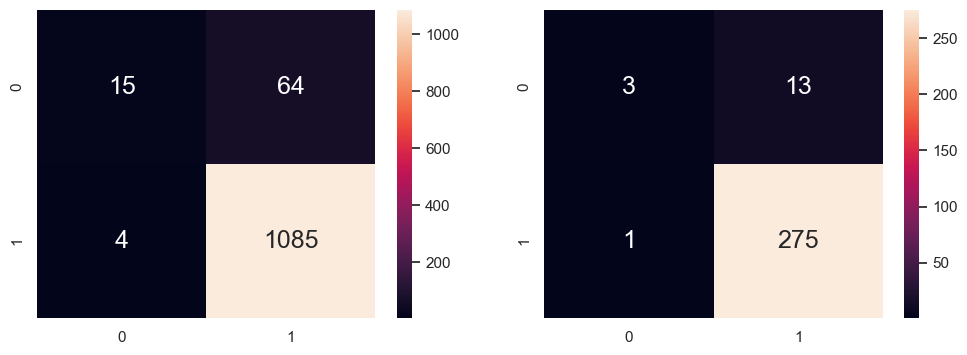

In [21]:
#qn 3
#Same thing with depth 4
# Decision Tree using Train Data
depth4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
depth4.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = depth4.predict(X_train)
y_test_pred = depth4.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", depth4.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", depth4.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

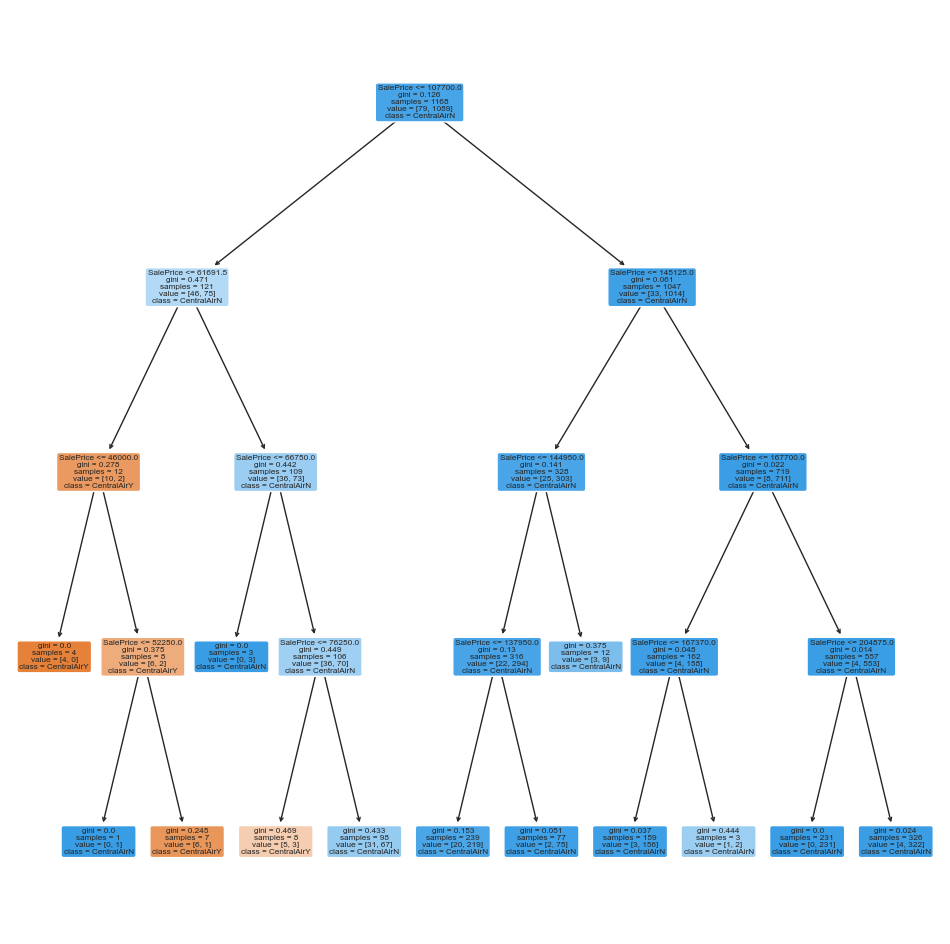

In [22]:
# Plot the trained Decision Tree
#from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(depth4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["CentralAirY","CentralAirN"])
plt.show()

In [23]:
#node with more than 105590 but less than 107700

In [24]:
traindata[['SalePrice','CentralAir']][(traindata['SalePrice']>106375) & (traindata['SalePrice']<107700) & (traindata['CentralAir']=='N')]

,SalePrice,CentralAir
74,107400,N
217,107000,N
896,106500,N
1292,107500,N
